In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import zscore

## Linear Regression
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split
## Classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
## Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
## MSE
from sklearn.metrics import mean_squared_error
## Accuracy
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/DSO 530 Group Project/option_train.csv', index_col=0)

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/DSO 530 Group Project/option_test_nolabel.csv', index_col=0)

## EDA

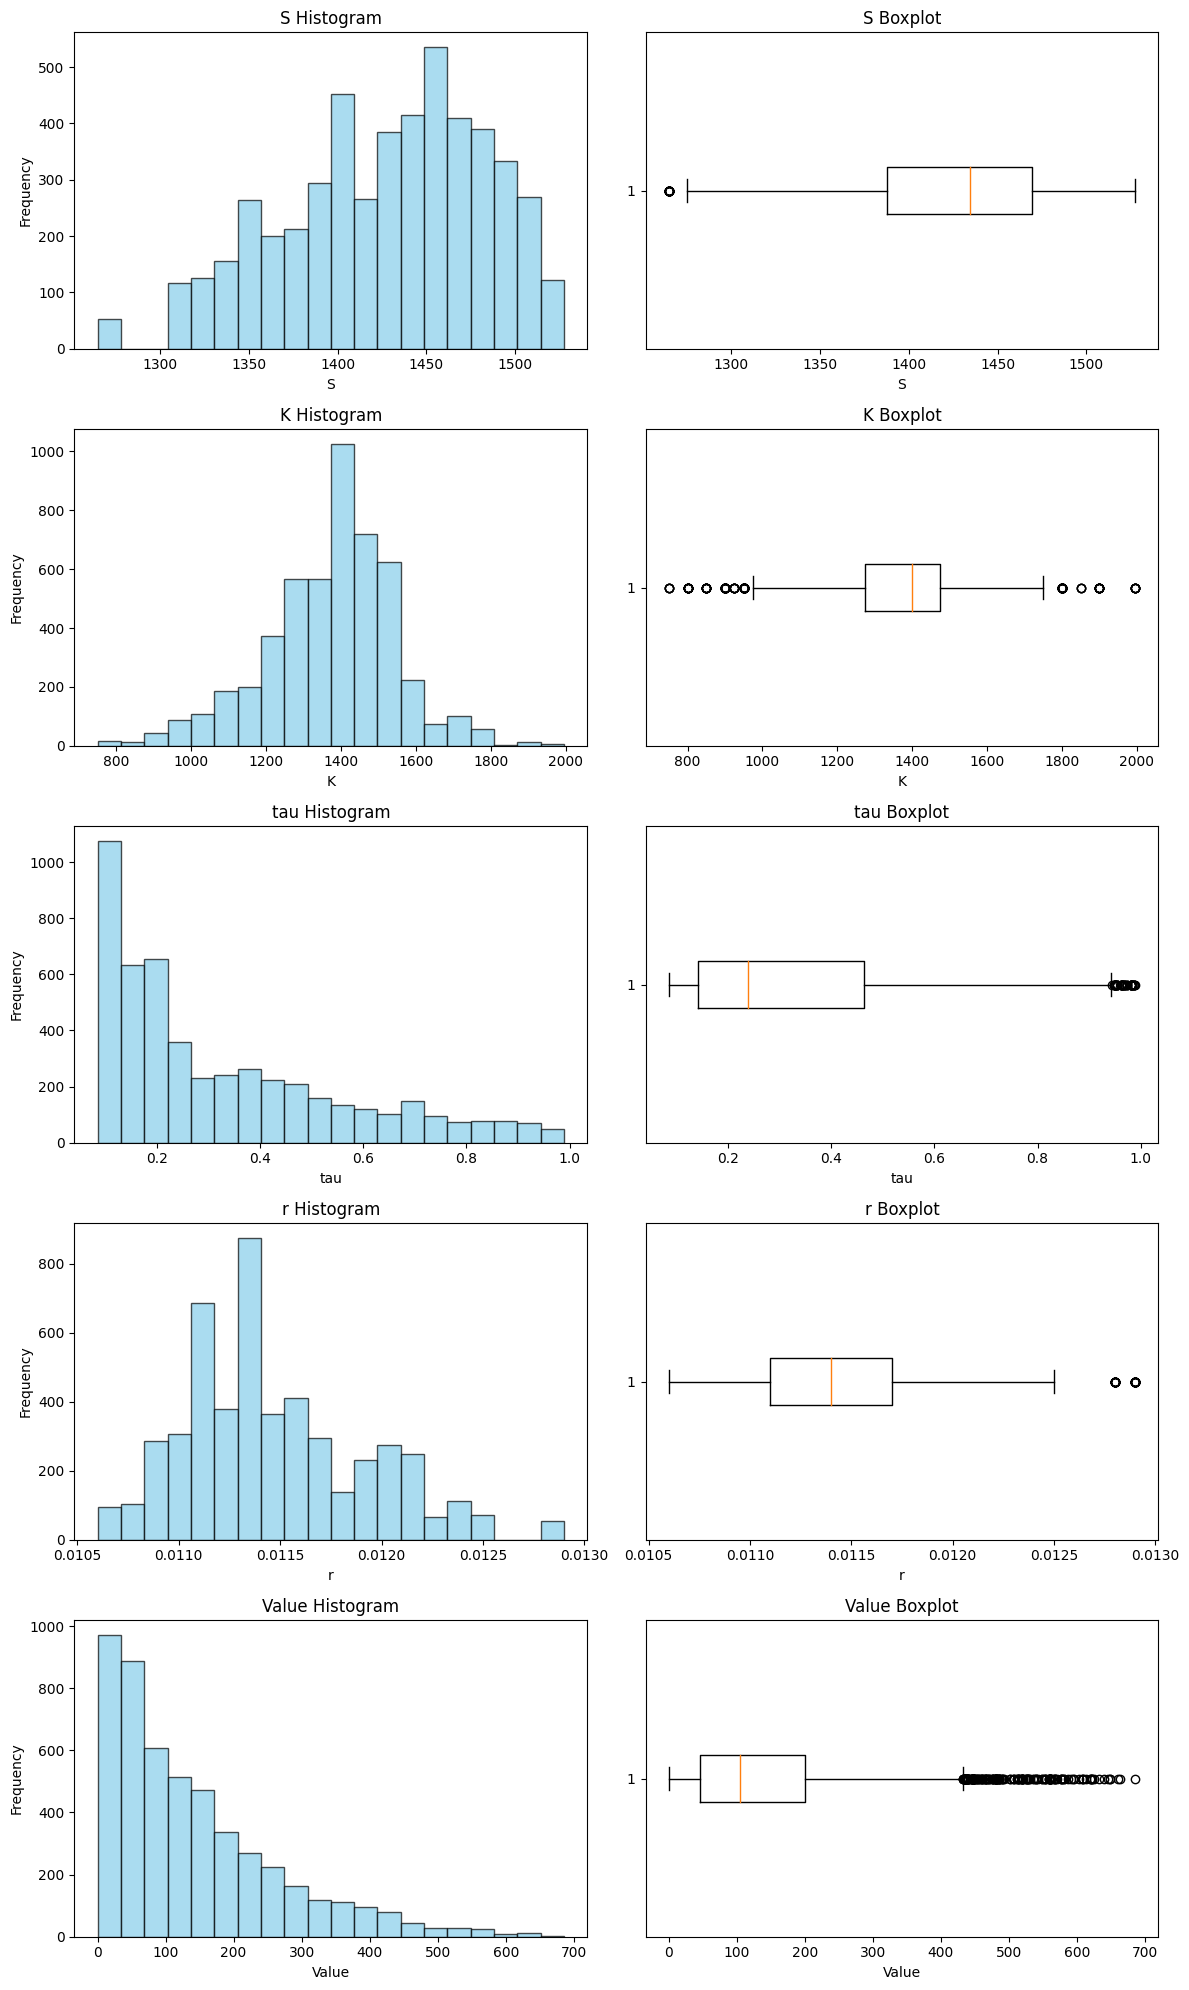

In [ ]:
# Checking distribution and outlier of train data
selected_columns = ['S', 'K', 'tau', 'r', 'Value']
selected_df = train_df[selected_columns]

fig, axs = plt.subplots(5, 2, figsize=(12, 20))

# Iterate over each column and plot a histogram and boxplot
for i, col in enumerate(selected_columns):
    # Plot histogram
    axs[i, 0].hist(selected_df[col], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    axs[i, 0].set_title(f'{col} Histogram')
    axs[i, 0].set_xlabel(col)
    axs[i, 0].set_ylabel('Frequency')

    # Plot boxplot
    axs[i, 1].boxplot(selected_df[col], vert=False)
    axs[i, 1].set_title(f'{col} Boxplot')
    axs[i, 1].set_xlabel(col)

plt.tight_layout()
plt.show()

In [ ]:
x = train_df[['S', 'K', 'tau', 'r']]

z_scores = x.apply(zscore)

# Define threshold for outlier detection (e.g., z-score greater than 3 or less than -3)
threshold = 3

# Check for outliers
outliers = (z_scores > threshold) | (z_scores < -threshold)

print("Outliers:")
print(outliers)

outliers = (z_scores > threshold) | (z_scores < -threshold)

# Count number of True values in each column
outlier_counts = outliers.sum()

print("Number of outliers in each column:")
print(outlier_counts)

Outliers:
          S      K    tau      r
1     False  False  False  False
2     False  False  False  False
3     False  False  False  False
4     False  False  False  False
5     False  False  False  False
...     ...    ...    ...    ...
4996  False  False  False  False
4997  False  False  False  False
4998  False  False  False  False
4999  False  False  False  False
5000  False  False  False  False

[5000 rows x 4 columns]
Number of outliers in each column:
S       0
K      46
tau     0
r      29
dtype: int64


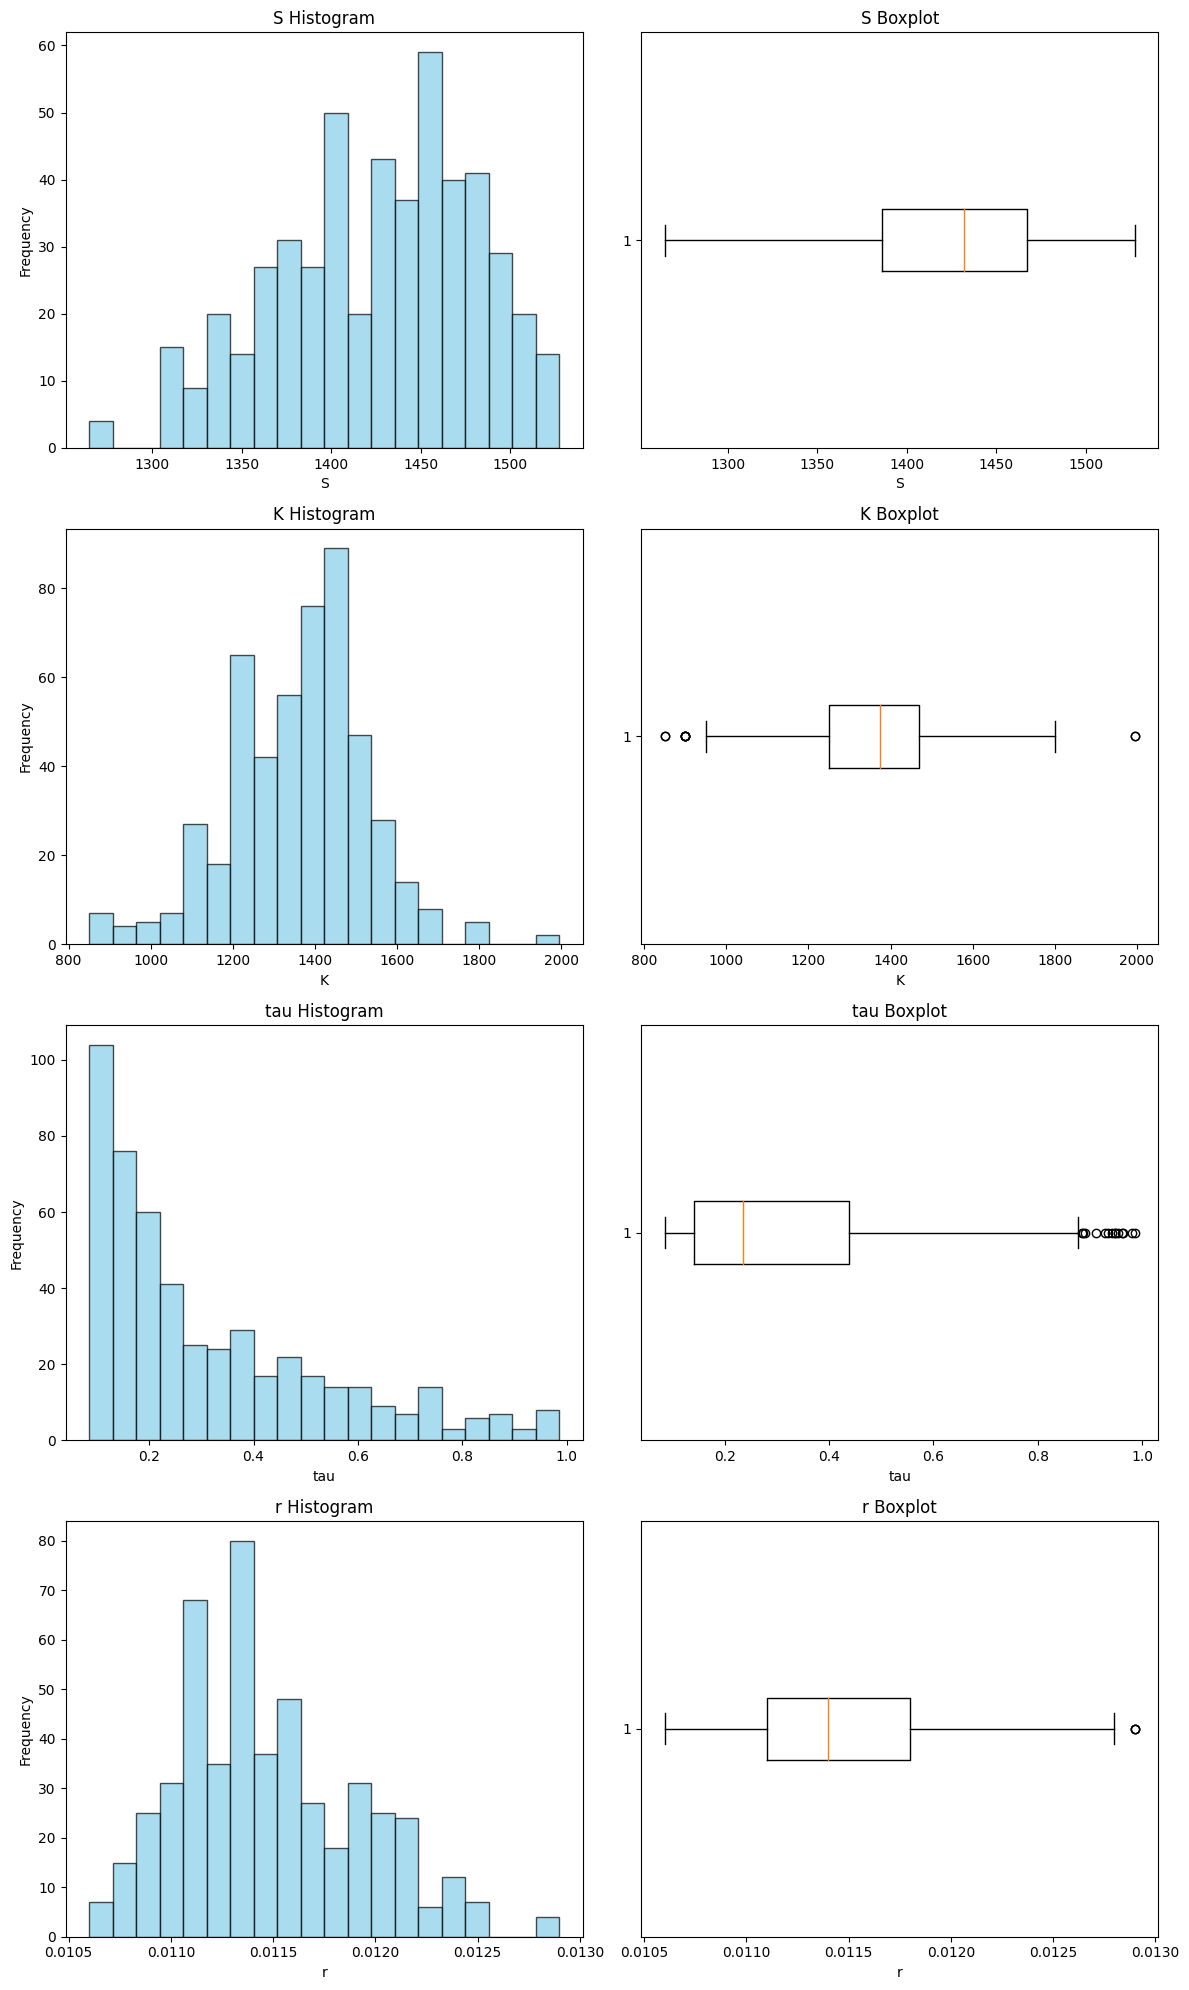

In [ ]:
# Checking distribution and outlier of test data
selected_columns = ['S', 'K', 'tau', 'r']
selected_df = test_df[selected_columns]

fig, axs = plt.subplots(4, 2, figsize=(12, 20))

# Iterate over each column and plot a histogram and boxplot
for i, col in enumerate(selected_columns):
    # Plot histogram
    axs[i, 0].hist(selected_df[col], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    axs[i, 0].set_title(f'{col} Histogram')
    axs[i, 0].set_xlabel(col)
    axs[i, 0].set_ylabel('Frequency')

    # Plot boxplot
    axs[i, 1].boxplot(selected_df[col], vert=False)
    axs[i, 1].set_title(f'{col} Boxplot')
    axs[i, 1].set_xlabel(col)

plt.tight_layout()
plt.show()

In [ ]:
x = test_df[['S', 'K', 'tau', 'r']]

z_scores = x.apply(zscore)

# Define threshold for outlier detection (e.g., z-score greater than 3 or less than -3)
threshold = 3

# Check for outliers
outliers = (z_scores > threshold) | (z_scores < -threshold)

print("Outliers:")
print(outliers)

outliers = (z_scores > threshold) | (z_scores < -threshold)

# Count number of True values in each column
outlier_counts = outliers.sum()

print("Number of outliers in each column:")
print(outlier_counts)

Outliers:
         S      K    tau      r
1    False  False  False  False
2    False  False  False  False
3    False  False  False  False
4    False  False  False  False
5    False  False  False  False
..     ...    ...    ...    ...
496  False  False  False  False
497  False  False  False  False
498  False  False  False  False
499  False  False  False  False
500  False  False  False   True

[500 rows x 4 columns]
Number of outliers in each column:
S      0
K      4
tau    1
r      3
dtype: int64


## Linear Regression

In [ ]:
train_df['Over'] = np.where(train_df['BS'] == 'Over', 1, 0)

In [ ]:
train_df

,Value,S,K,tau,r,BS,Over
1,348.500,1394.46,1050,0.128767,0.0116,Under,0
2,149.375,1432.25,1400,0.679452,0.0113,Under,0
3,294.500,1478.90,1225,0.443836,0.0112,Under,0
4,3.375,1369.89,1500,0.117808,0.0119,Over,1
5,84.000,1366.42,1350,0.298630,0.0119,Under,0
...,...,...,...,...,...,...,...
4996,325.250,1465.15,1175,0.424658,0.0111,Under,0
4997,36.000,1480.87,1480,0.101370,0.0111,Over,1
4998,90.000,1356.56,1500,0.673973,0.0120,Under,0
4999,175.875,1333.36,1200,0.309589,0.0122,Under,0


In [ ]:
## high correlation variables: Value and K, S and r
train_df[['Value', 'S', 'K', 'tau', 'r', 'Over']].corr()

,Value,S,K,tau,r,Over
Value,1.000000,0.148884,-0.880802,0.255343,-0.163317,-0.486149
S,0.148884,1.000000,0.128228,-0.020299,-0.983740,0.061290
K,-0.880802,0.128228,1.000000,0.022948,-0.111107,0.537382
tau,0.255343,-0.020299,0.022948,1.000000,0.010245,-0.172979
r,-0.163317,-0.983740,-0.111107,0.010245,1.000000,-0.046926
Over,-0.486149,0.061290,0.537382,-0.172979,-0.046926,1.000000


In [ ]:
## Check Null values
train_df.isnull().sum()

Value    0
S        0
K        0
tau      0
r        0
BS       0
Over     0
dtype: int64

In [ ]:
y = train_df['Value']
x = train_df.drop(columns = ['Value', 'BS', 'Over'], axis = 1)
x_sm = sm.add_constant(train_df.drop(columns = ['Value', 'BS', 'Over'], axis = 1))

In [ ]:
model1 = sm.OLS(y, x_sm).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 1.540e+04
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        21:37:34   Log-Likelihood:                -24767.
No. Observations:                5000   AIC:                         4.954e+04
Df Residuals:                    4995   BIC:                         4.958e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        185.5711    137.834      1.346      0.178     -84.644     455.786
S              0.5924      0.049     12.203      0.000       0.497       0.688
K             -0.6684      0.003   -235.028      0.000      -0.674      -0.663
tau          152.6475      2.103     72.601      0.000     148.526     156.769
r          -2142.4445   6054.403     -0.354      0.723    -1.4e+04    9726.844
==============================================================================
Omnibus:                     3143.142   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45196.502
Skew:                           2.789   Prob(JB):                         0.00
Kurtosis:                      16.632   Cond. No.                     2.48e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

### Multiple Linear Regression (All Variables)

In [ ]:
linear_model = LinearRegression().fit(x_train, y_train)

In [ ]:
## get out-of-sample r_square
r_sq_train = linear_model.score(x_train, y_train)
r_sq_test = linear_model.score(x_test, y_test)
print(f'R-square on test data: {r_sq_test}')

R-square on test data: 0.9277499338465945


In [ ]:
kfolds_regresssion = KFold(n_splits = 10, random_state = 42, shuffle = True)
linreg_cv = -cross_val_score(LinearRegression(),x,y, cv=kfolds_regresssion, scoring = 'neg_mean_squared_error')
linreg_cv.mean()

1178.3049311756483

### Best subset selection

In [ ]:
def processSubset(feature_set):
  # Fit model on feature_set and calculate RSS
  X1 = sm.add_constant(x[list(feature_set)])
  model = sm.OLS(y,X1)
  regr = model.fit()
  RSS = ((regr.predict(X1)- y) ** 2).sum()
  return {"model":regr, "RSS":RSS}

In [ ]:
import itertools
import time
def getBest(k):
  tic = time.time()
  results = []
  for combo in itertools.combinations(x.columns, k):
    results.append(processSubset(combo)) # Wrap everything up in a nice dataframe

  models = pd.DataFrame(results) # Choose the model with the smallest RSS
  best_model = models.loc[models['RSS'].idxmin()] # idxmin() function returns index of first occurrence of minimum.
  toc = time.time()
  print("Processed ", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.") # Return the best model, along with some other useful information about the␣ model
  return best_model

In [ ]:
models = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()

In [ ]:
for i in range(0,5):
  models.loc[i] = getBest(i)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  1 models on 0 predictors in 0.0063135623931884766 seconds.
Processed  4 models on 1 predictors in 0.020230770111083984 seconds.
Processed  6 models on 2 predictors in 0.027276277542114258 seconds.
Processed  4 models on 3 predictors in 0.020917654037475586 seconds.
Processed  1 models on 4 predictors in 0.0061206817626953125 seconds.
Total elapsed time: 0.11187863349914551 seconds.


Text(0, 0.5, 'BIC')

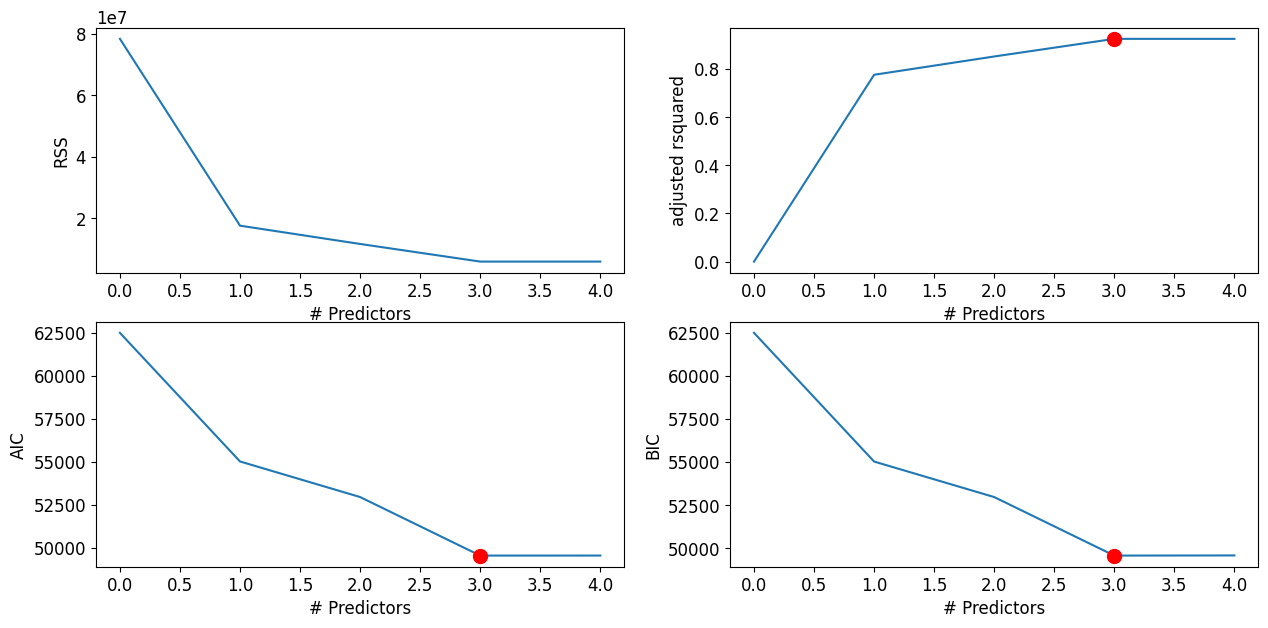

In [ ]:
plt.figure(figsize=(15,7))
plt.rcParams.update({'font.size':12,'lines.markersize': 10})

plt.subplot(2, 2, 1)

plt.plot(models["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

rsquared_adj = models.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.idxmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

aic = models.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.idxmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.idxmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

In [ ]:
print(aic)
print(bic)

0    62485.914929
1    55011.542505
2    52944.503993
3    49542.137448
4    49544.012104
dtype: float64
0    62492.432122
1    55024.576891
2    52964.055573
3    49568.206221
4    49576.598070
dtype: float64


In [ ]:
models.iloc[3,1].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 2.053e+04
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        21:37:36   Log-Likelihood:                -24767.
No. Observations:                5000   AIC:                         4.954e+04
Df Residuals:                    4996   BIC:                         4.957e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        137.0005     12.594     10.878      0.000     112.311     161.690
S              0.6093      0.009     69.815      0.000       0.592       0.626
K             -0.6684      0.003   -235.952      0.000      -0.674      -0.663
tau          152.6895      2.099     72.744      0.000     148.575     156.804
==============================================================================
Omnibus:                     3141.362   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45094.076
Skew:                           2.788   Prob(JB):                         0.00
Kurtosis:                      16.615   Cond. No.                     5.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
best_subset_x = x.drop(['r'],axis = 1)

In [ ]:
best_subset_x_train, best_subset_x_test, best_subset_y_train, best_subset_y_test = train_test_split(best_subset_x, y, test_size = 0.2, random_state = 42)

In [ ]:
best_subset_model = LinearRegression().fit(best_subset_x_train, best_subset_y_train)

In [ ]:
r_sq_best_subset_train = best_subset_model.score(best_subset_x_train, best_subset_y_train)
r_sq_best_subset_test = best_subset_model.score(best_subset_x_test, best_subset_y_test)
print(r_sq_best_subset_test)

0.9277485886520626


In [ ]:
best_subset_linreg_cv = -cross_val_score(LinearRegression(),best_subset_x,y, cv=kfolds_regresssion, scoring = 'neg_mean_squared_error')
best_subset_linreg_cv.mean()

1177.9077976607487

### Ridge Regression

In [ ]:
## standardize the data
from sklearn.preprocessing import StandardScaler
# Fit the StandardScaler to the training data
scaler = StandardScaler().fit(x_train)

# Transform the training and test data using the fitted scaler
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

In [ ]:
## find the best lambda for Ridge Regression (shrinkage)
alphas = 10**np.linspace(10,-2,100)*0.5

In [ ]:
coefs = []
ridge = Ridge()

for i in alphas:
  ridge.set_params(alpha = i)
  ridge.fit(x_train_std, y_train)
  coefs.append(ridge.coef_.flatten())

np.shape(coefs)

(100, 4)

Text(0, 0.5, 'standadized coef')

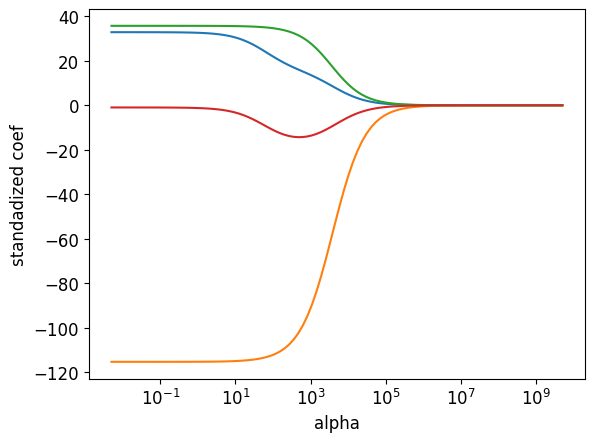

In [ ]:
%matplotlib inline
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('standadized coef')

In [ ]:
ridgecv = RidgeCV(alphas=alphas, scoring='r2', cv=10)
ridgecv.fit(x_train_std, y_train)
ridgecv.alpha_

2.320794416806386

In [ ]:
## out-of-sample r_square
ridge_regression = Ridge(alpha = ridgecv.alpha_)
ridge_regression.fit(x_train_std, y_train)
r_sq_ridge_train = ridge_regression.score(x_train_std, y_train)
r_sq_ridge_test = ridge_regression.score(x_test_std, y_test)
print(f'The Ridge Regression R-square on test data: {r_sq_ridge_test}')

The Ridge Regression R-square on test data: 0.9277357412081971


Very close to the full model, but we solved the problem of multicollinearity.

### Lasso Regression

In [ ]:
np.shape(train_df)

(5000, 7)

Text(0, 0.5, 'standardized coef')

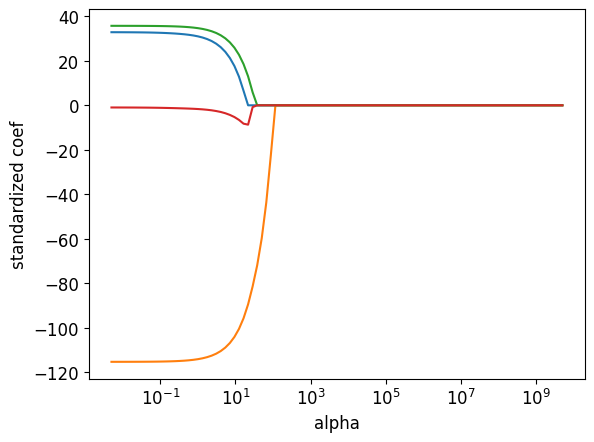

In [ ]:
lasso = Lasso(max_iter = 1000)
coefs_lasso = []

for i in alphas:
  lasso.set_params(alpha = i)
  lasso.fit(x_train_std, y_train)
  coefs_lasso.append(lasso.coef_)

%matplotlib inline
ax = plt.gca()
ax.plot(alphas, coefs_lasso)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('standardized coef')


In [ ]:
lassocv = LassoCV(alphas=alphas, cv=10, max_iter=10000)
lassocv.fit(x_train_std, y_train)
lasso1 = Lasso(max_iter=10000)
lasso1.set_params(alpha=lassocv.alpha_)
lasso1.fit(x_train_std, y_train)
r_sq_lasso_train = lasso1.score(x_train_std, y_train)
r_sq_lasso_test = lasso1.score(x_test_std, y_test)
print(f'The Ridge Regression R-square on test data: {r_sq_lasso_test}')

The Ridge Regression R-square on test data: 0.9277480854112218


### Decision Tree

In [ ]:
y = train_df['Value']
x = train_df.drop(columns = ['Value', 'BS', 'Over'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Rerun the decision tree regressor
DTregressor = DecisionTreeRegressor(random_state=42, max_depth=6)
DTregressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=42)

In [ ]:
# Evaluating the regressor
r_sq_decision_tree_train = DTregressor.score(x_train, y_train)
r_sq_decision_tree_test = DTregressor.score(x_test, y_test)
print(f'Decision Tree R-squared: {r_sq_decision_tree_test}')

Decision Tree R-squared: 0.964167906760108


In [ ]:
decision_tree_cv = -cross_val_score(DTregressor,x,y, cv=kfolds_regresssion, scoring = 'neg_mean_squared_error')
decision_tree_cv.mean()

557.6030718286995

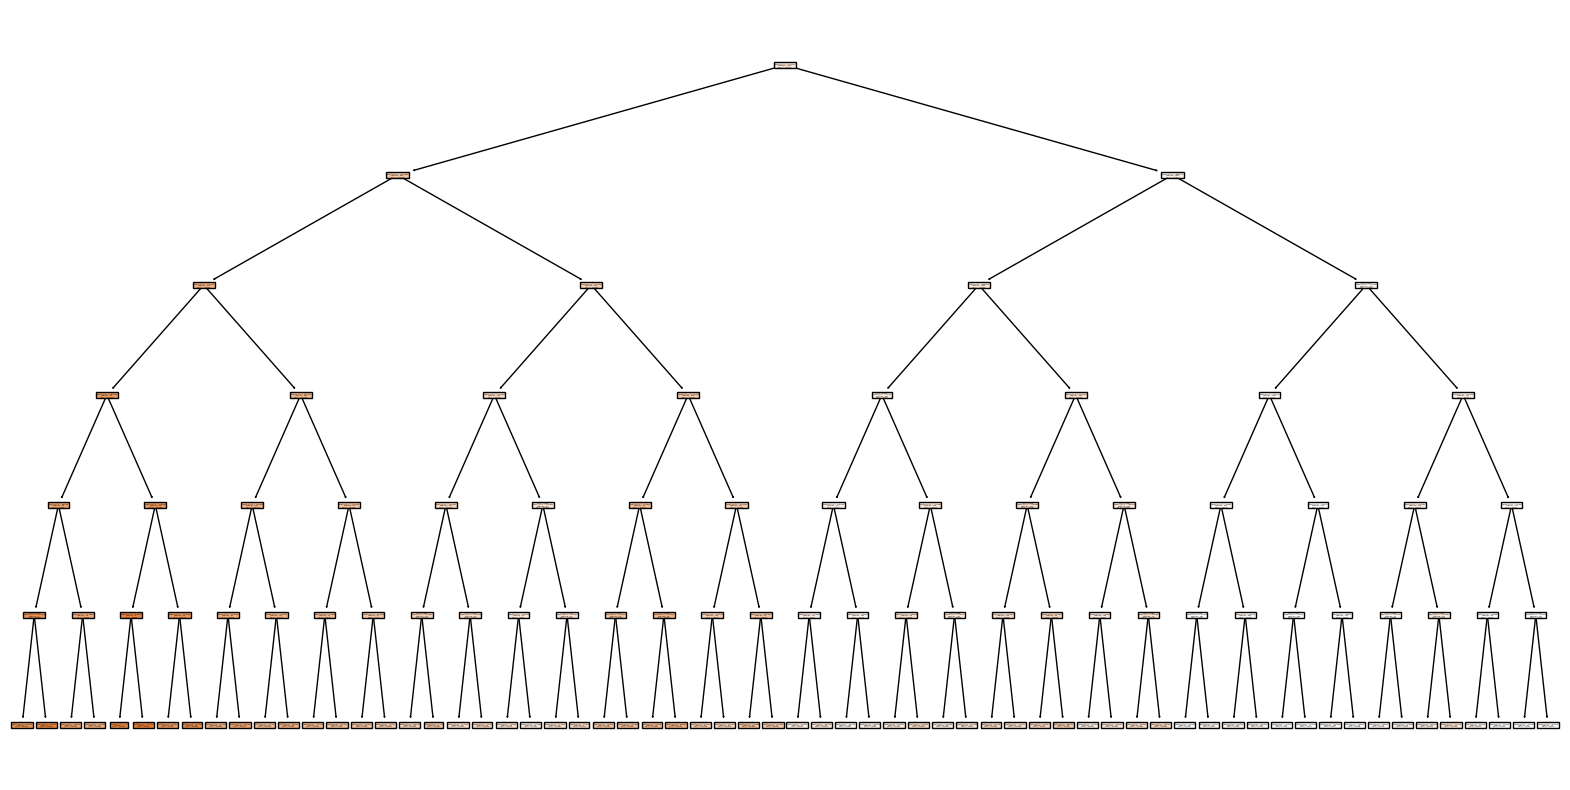

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(DTregressor, filled=True, feature_names=x_train.columns)
plt.show()

###Bagging and Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
BGregressor = RandomForestRegressor(n_estimators=200, random_state= 42, max_features = 4)
BGregressor.fit(x_train, y_train)

RandomForestRegressor(max_features=4, n_estimators=200, random_state=42)

In [ ]:
r_sq_bagging_train = BGregressor.score(x_train, y_train)
r_sq_bagging_test = BGregressor.score(x_test, y_test)
print(f'Bagging R-squared: {r_sq_bagging_test}')

Bagging R-squared: 0.9965278802464829


In [ ]:
bagging_cv = -cross_val_score(BGregressor,x,y, cv=kfolds_regresssion, scoring = 'neg_mean_squared_error')
bagging_cv.mean()

51.131438200253896

In [ ]:
# m = 1
RFregressor1 = RandomForestRegressor(n_estimators=200, random_state= 42, max_features = 1)
RFregressor1.fit(x_train, y_train)

# m = 2
RFregressor2 = RandomForestRegressor(n_estimators=200, random_state= 42, max_features = 2)
RFregressor2.fit(x_train, y_train)

# m = 3
RFregressor3 = RandomForestRegressor(n_estimators=200, random_state= 42, max_features = 3)
RFregressor3.fit(x_train, y_train)

print(f'Random forest(m=1) R-squared: {RFregressor1.score(x_test, y_test)}')
print(f'Random forest(m=2) R-squared: {RFregressor2.score(x_test, y_test)}')
print(f'Random forest(m=3) R-squared: {RFregressor3.score(x_test, y_test)}')

Random forest(m=1) R-squared: 0.9795441241930927
Random forest(m=2) R-squared: 0.9956090145795549
Random forest(m=3) R-squared: 0.9966669887223083


In [ ]:
RF1_cv = -cross_val_score(RFregressor1,x,y, cv=kfolds_regresssion, scoring = 'neg_mean_squared_error')
RF2_cv = -cross_val_score(RFregressor2,x,y, cv=kfolds_regresssion, scoring = 'neg_mean_squared_error')
RF3_cv = -cross_val_score(RFregressor3,x,y, cv=kfolds_regresssion, scoring = 'neg_mean_squared_error')

In [ ]:
print(f'Random forest(m=1) CV: {RF1_cv.mean()}')
print(f'Random forest(m=2) CV: {RF2_cv.mean()}')
print(f'Random forest(m=3) CV: {RF3_cv.mean()}')

Random forest(m=1) CV: 252.64892927141332
Random forest(m=2) CV: 54.55499168537815
Random forest(m=3) CV: 47.055115592680664


In [ ]:
r_sq_RF_train = RFregressor3.score(x_train, y_train)
r_sq_RF_test = RFregressor3.score(x_test, y_test)

###Boosting

In [ ]:
#Using XGBoost
from xgboost import XGBRegressor

In [ ]:
xgb_regressor0 = XGBRegressor(random_state = 42, n_estimators = 200, max_depth = 6)
xgb_regressor0.fit(x_train, y_train)

r_sq_boosting_test0 = xgb_regressor0.score(x_test, y_test)
print(f"Boosting R-squared: {r_sq_boosting_test0}")

Boosting R-squared: 0.9972813839893019


In [ ]:
xgb_regressor = XGBRegressor(random_state = 42, n_estimators = 2000, max_depth = 3)

# Lists to store performance metrics
train_rmse_scores = []
val_rmse_scores = []

# Train the model and record performance metrics after each boosting round
xgb_regressor.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_test, y_test)], eval_metric='rmse',
                   verbose=False, early_stopping_rounds = 10)

r_sq_boosting_train = xgb_regressor.score(x_train, y_train)
r_sq_boosting_test = xgb_regressor.score(x_test, y_test)
print(f"Boosting R-squared: {r_sq_boosting_test}")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Boosting R-squared: 0.9980581779067782


In [ ]:
r_sq_boosting_train

0.9993825248500351

In [ ]:
boosting_cv = -cross_val_score(xgb_regressor,x,y, cv=kfolds_regresssion, scoring = 'neg_mean_squared_error')
boosting_cv.mean()

NameError: name 'kfolds_regresssion' is not defined

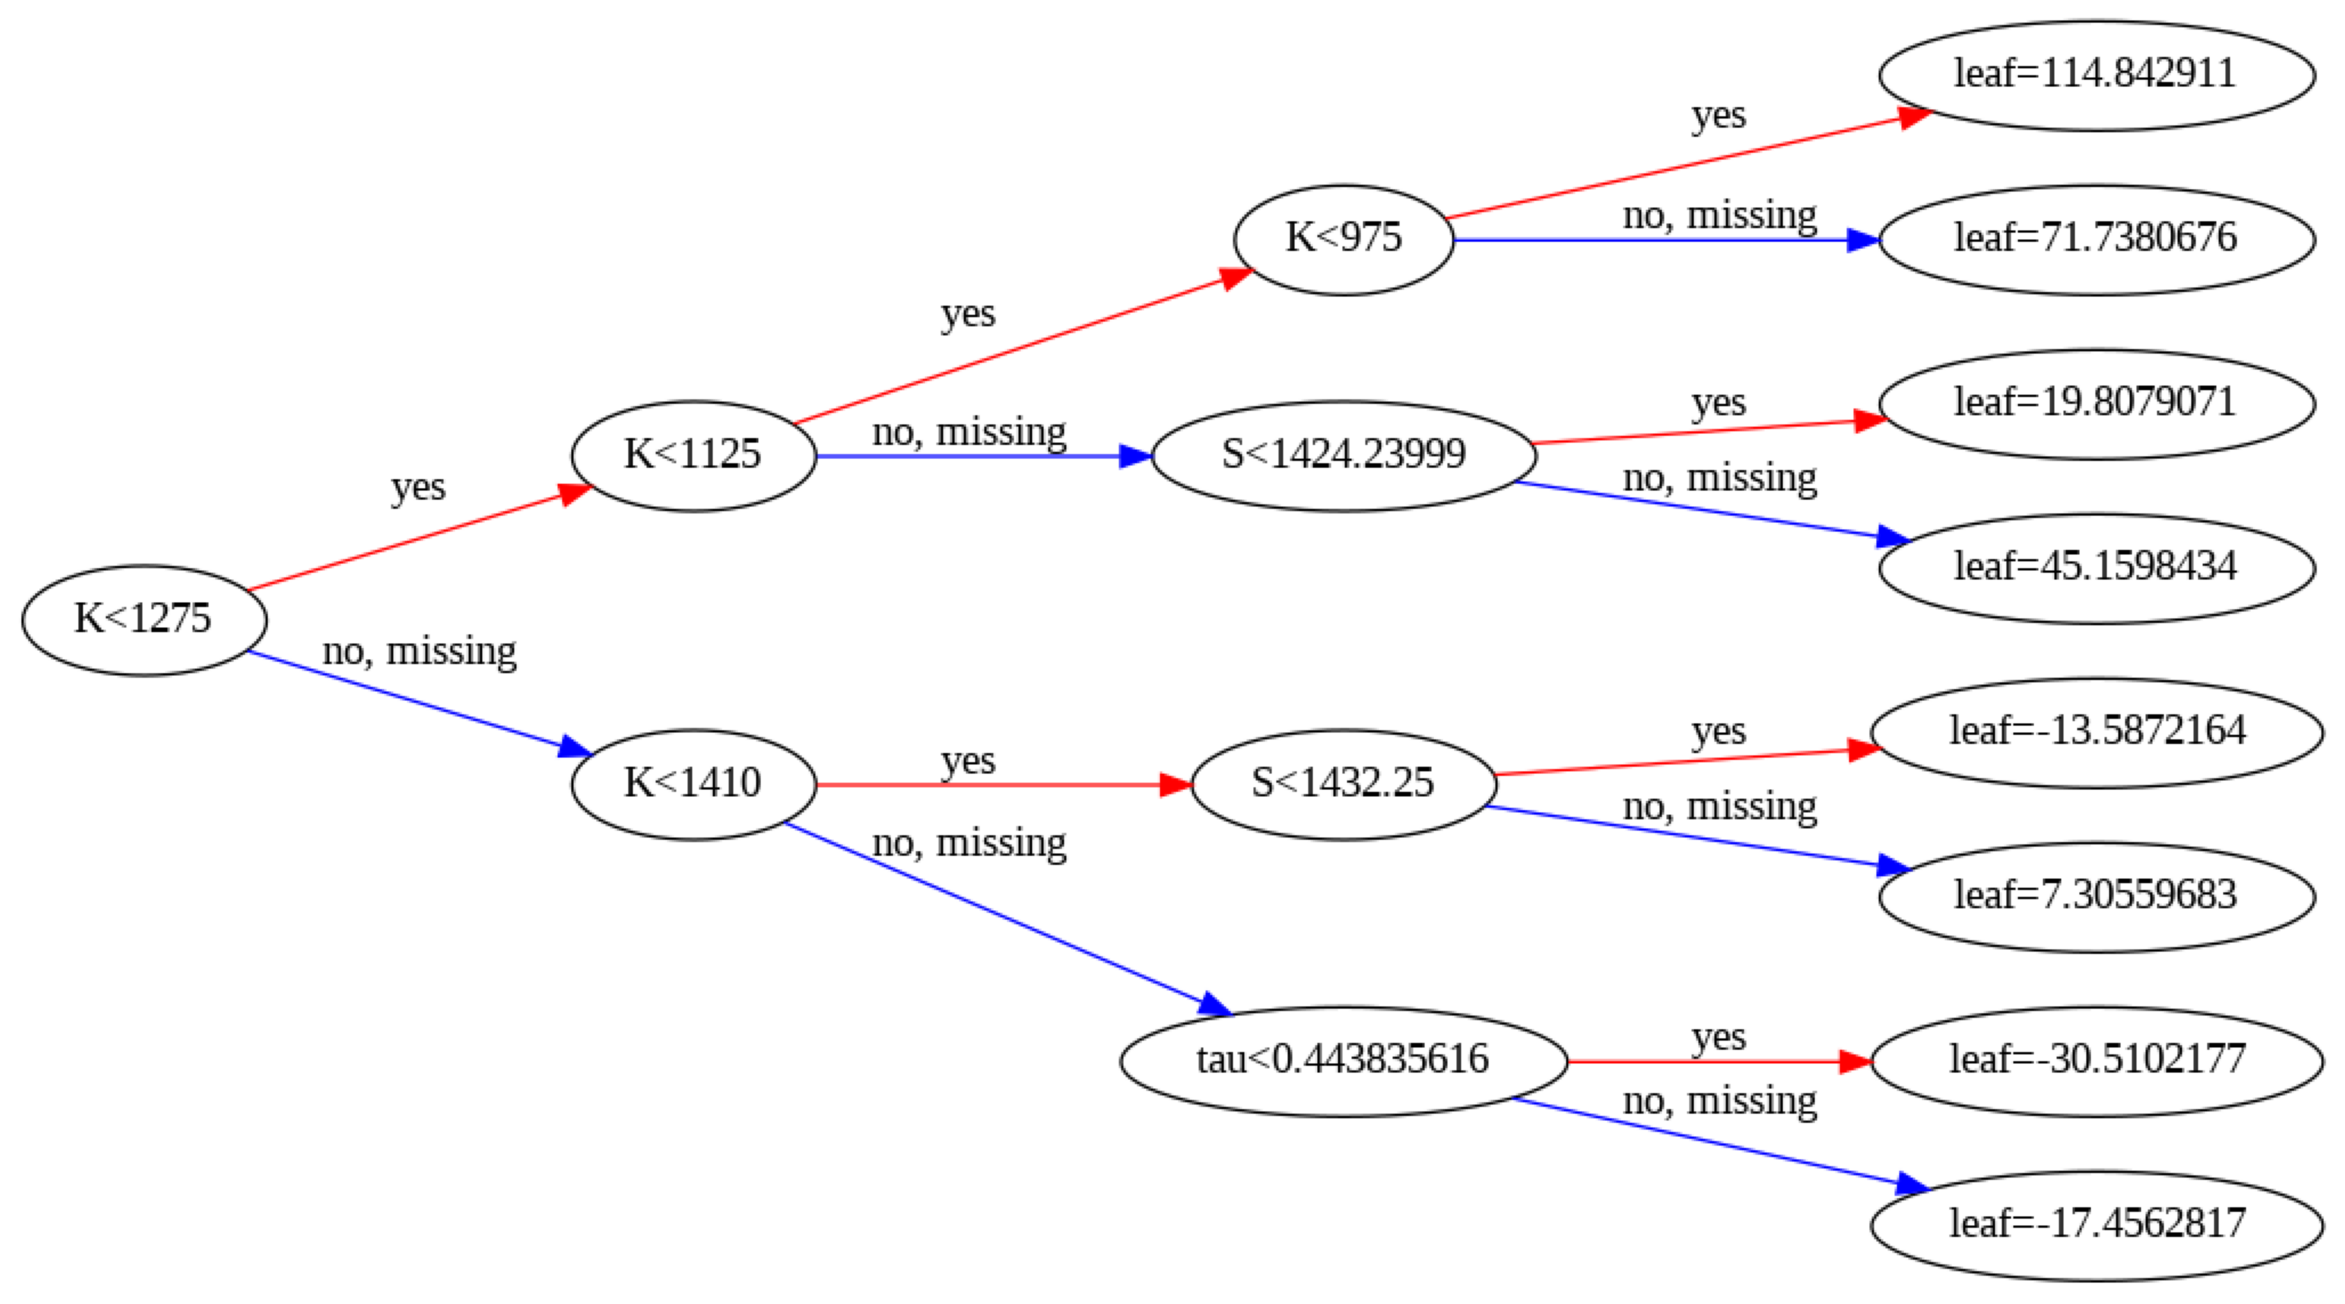

In [ ]:
import xgboost as xgb
fig, ax = plt.subplots(figsize=(30, 20))

# Plotting the first boosting tree with a larger size
xgb.plot_tree(xgb_regressor, num_trees=0, ax=ax, rankdir='LR')

plt.show()

In [ ]:
importance = xgb_regressor.feature_importances_
feature_names = x_train.columns # Assuming x_train is a DataFrame
feature_importance_dict = dict(zip(feature_names, importance))
feature_importance_dict

{'S': 0.06892527, 'K': 0.82007533, 'tau': 0.052882694, 'r': 0.05811665}

In [ ]:
xgb_regressor.get_booster().get_score(importance_type='weight')

{'S': 1924.0, 'K': 1977.0, 'tau': 1386.0, 'r': 320.0}

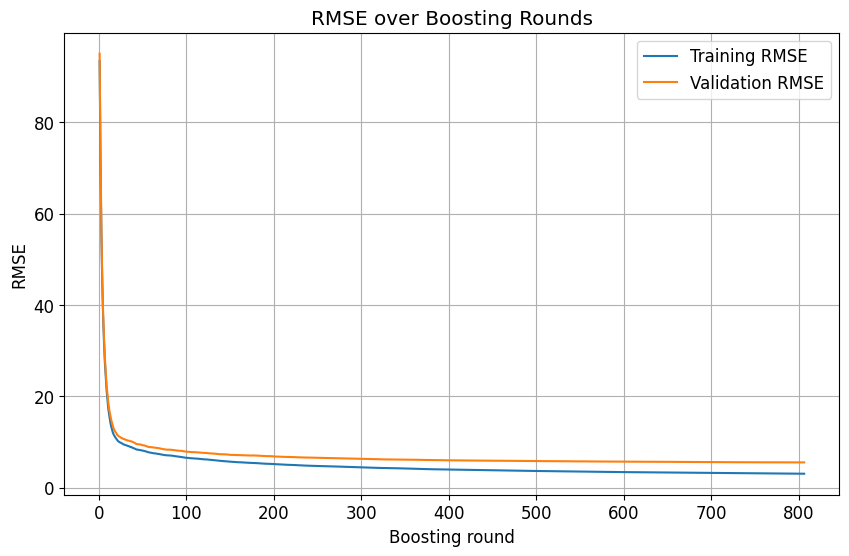

In [ ]:
# Extract evaluation results
evals_result = xgb_regressor.evals_result()

# Extract RMSE scores
train_rmse_scores = evals_result['validation_0']['rmse']
val_rmse_scores = evals_result['validation_1']['rmse']

# Plot RMSE scores over boosting rounds
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_rmse_scores) + 1), train_rmse_scores, label='Training RMSE')
plt.plot(range(1, len(val_rmse_scores) + 1), val_rmse_scores, label='Validation RMSE')
plt.xlabel('Boosting round')
plt.ylabel('RMSE')
plt.title('RMSE over Boosting Rounds')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
len(train_rmse_scores)

806

###Compare to Black-Scholes

In [ ]:
from scipy.stats import norm

def black_scholes(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

In [ ]:
# Use S&P 500 10y standard deviation as sigma
train_df['bs_pred'] = black_scholes(train_df['S'], train_df['K'], train_df['tau'], train_df['r'], 0.1511)
r_sq_bs = r2_score(train_df['Value'], train_df['bs_pred'])

###Visualization

In [ ]:
# Assuming you have the R-squared values for each model stored in variables
model_names = ['Multiple linear Regression', 'Best Subset Linear Regression', 'Ridge', 'Lasso', 'Black Scholes','Decision Tree', 'Bagging', 'Random Forest', 'Boosting']
in_sample_r_squared = [r_sq_train, r_sq_best_subset_train, r_sq_ridge_train, r_sq_lasso_train, None, r_sq_decision_tree_train, r_sq_bagging_train, r_sq_RF_train, r_sq_boosting_train]  # List of in-sample R-squared values
out_of_sample_r_squared = [r_sq_test, r_sq_best_subset_test, r_sq_ridge_test, r_sq_lasso_test, None ,r_sq_decision_tree_test, r_sq_bagging_test, r_sq_RF_test, r_sq_boosting_test]  # List of out-of-sample R-squared values
black_scholes_list = [None, None, None, None, r_sq_bs, None, None, None, None]

# Create a pandas DataFrame
data = {
    'Model': model_names,
    'In-Sample R-squared': in_sample_r_squared,
    'Out-of-Sample R-squared': out_of_sample_r_squared,
    'Black Scholes': black_scholes_list
}

viz = pd.DataFrame(data)
# Display the DataFrame
print(viz)


                           Model  In-Sample R-squared  \
0     Multiple linear Regression             0.924229   
1  Best Subset Linear Regression             0.924227   
2                          Ridge             0.924228   
3                          Lasso             0.924229   
4                  Black Scholes                  NaN   
5                  Decision Tree             0.969382   
6                        Bagging             0.999521   
7                  Random Forest             0.999560   
8                       Boosting             0.999383   

   Out-of-Sample R-squared  Black Scholes  
0                 0.927750            NaN  
1                 0.927749            NaN  
2                 0.927736            NaN  
3                 0.927748            NaN  
4                      NaN       0.937557  
5                 0.964168            NaN  
6                 0.996528            NaN  
7                 0.996667            NaN  
8                 0.998058       

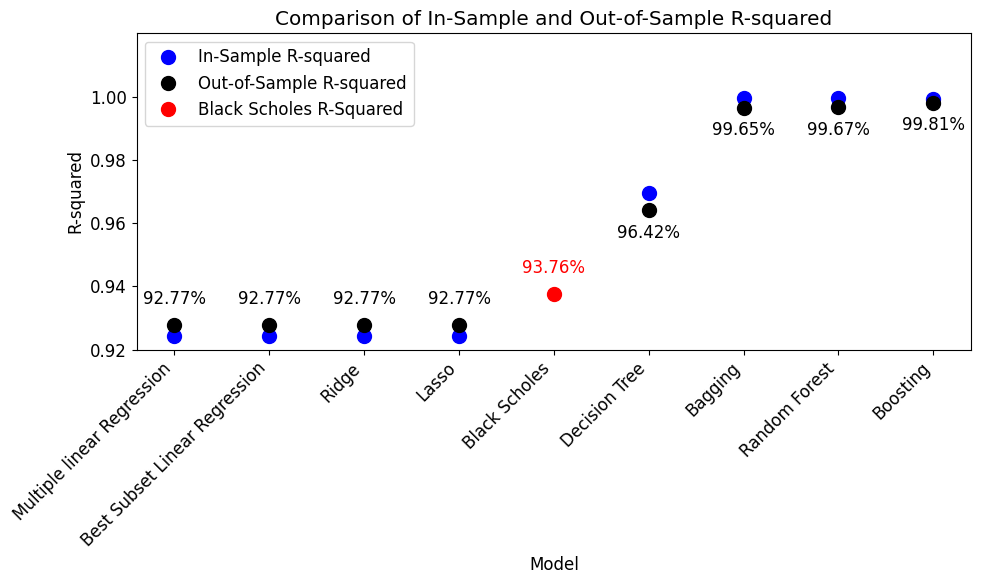

In [ ]:
import matplotlib.pyplot as plt

# Assuming viz is your DataFrame

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(viz['Model'], viz['In-Sample R-squared'], 'bo', label='In-Sample R-squared', markersize=10)
plt.plot(viz['Model'], viz['Out-of-Sample R-squared'], 'ko', label='Out-of-Sample R-squared', markersize=10)  # Changed color to black
plt.plot(viz['Model'], viz['Black Scholes'], 'ro', label='Black Scholes R-Squared', markersize=10)

for i, txt in enumerate(viz['Out-of-Sample R-squared']):
    if i < 4:  # Position some annotations above the dots
        plt.annotate(f'{txt*100:.2f}%', (viz['Model'][i], viz['Out-of-Sample R-squared'][i]), textcoords="offset points", xytext=(0,15), ha='center', color='black')
    else:  # Position some annotations below the dots
        plt.annotate(f'{txt*100:.2f}%', (viz['Model'][i], viz['Out-of-Sample R-squared'][i]), textcoords="offset points", xytext=(0,-20), ha='center', color='black')

plt.annotate(f"{viz['Black Scholes'][4]*100:.2f}%", (viz["Model"][4], viz["Black Scholes"][4]), textcoords="offset points", xytext=(0,15), ha="center", color="red")

plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('Comparison of In-Sample and Out-of-Sample R-squared')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.92, 1.02)
plt.yticks([0.92, 0.94, 0.96, 0.98, 1.00])
plt.legend()
plt.tight_layout()
plt.savefig('/content/drive/My Drive/plot.png', transparent=True)
plt.show()


## Classification

In [ ]:
## Classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/DSO 530 Group Project/option_train.csv', index_col=0)

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/DSO 530 Group Project/option_test_nolabel.csv', index_col=0)

In [ ]:
BS_num = []

for row in range(len(train_df['BS'])):
  if train_df['BS'][row+1] == 'Under':
    BS_num.append(0)
  else:
    BS_num.append(1)

In [ ]:
train_df['BS_num'] = BS_num

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_df[['S', 'K', 'tau', 'r']], train_df[['BS_num']], test_size=0.2, random_state=41)

Decision Tree
- Ensemble Methods: Random Forests
- Boosting(?)

In [ ]:
clf_tree = DecisionTreeClassifier(random_state=0)

path = clf_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

print(ccp_alphas)

In [ ]:
# Assuming X_train and y_train are your predictors and target variable respectively
# Ensure that X_train and y_train have been properly defined before this point

# Resetting indices of X_train and y_train
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Initialize StratifiedKFold
kfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Define ccp_alphas if not defined already
# ccp_alphas = ...

# Initialize list to store accuracies
accuracies = []

# Iterate over different ccp_alphas
for ccp_alpha in ccp_alphas:
    score_for_alpha = []

    # Perform cross-validation
    for train_index, test_index in kfolds.split(X_train, y_train):
        clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)

        # Train the classifier
        clf.fit(X_train.iloc[train_index], y_train.iloc[train_index])

        # Make predictions on the validation set
        y_pred = clf.predict(X_train.iloc[test_index])

        # Calculate accuracy
        score = accuracy_score(y_pred, y_train.iloc[test_index])
        score_for_alpha.append(score)

    # Compute mean accuracy for this ccp_alpha
    accuracies.append(sum(score_for_alpha) / len(score_for_alpha))

In [ ]:
print("The accuracies: ",accuracies)
print("\nThe index corresponding to the maximum of the accuracies: ", np.argmax(accuracies), "at", round(np.max(accuracies), 2))

In [ ]:
# Use the selected alpha to retrain a tree on the entire (X_train,y_train)
alpha_cv = ccp_alphas[np.argmax(accuracies)]
clf_tree_final = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha_cv)
clf_tree_final.fit(X_train, y_train)
# Evaluate on the (X_test,y_test)
y_pred_test = clf_tree_final.predict(X_test)
score_test = accuracy_score(y_test, y_pred_test)
print(score_test)

Random Forest

In [ ]:
X_train = train_df[['S', 'K', 'tau', 'r']]

y_train = train_df[['BS_num']]

X_test = test_df[['S', 'K', 'tau', 'r']]

In [ ]:
# Initialize the classifier
clf_rf = RandomForestClassifier(random_state=41, n_estimators=100)
clf_rf.fit(train_df[['S', 'K', 'tau', 'r']], train_df['BS_num'])

# Perform k-fold cross-validation
cv_scores_rf = cross_val_score(clf_rf, train_df[['S', 'K', 'tau', 'r']], train_df['BS_num'], cv=10)

# Print or store the mean cross-validated score
mean_cv_score_rf = cv_scores_rf.mean()
print("Mean cross-validated score:", mean_cv_score_rf)

print("Mean classification error:", 1-mean_cv_score_rf)

Mean cross-validated score: 0.9394
Mean classification error: 0.06059999999999999


Bagging

In [ ]:
# Initialize the base classifier (e.g., Decision Tree)
base_classifier = DecisionTreeClassifier(random_state=1)

base_classifier = DecisionTreeClassifier(random_state=1)


# Initialize the BaggingClassifier
bagging_clf = BaggingClassifier(base_estimator=base_classifier, n_estimators=10, random_state=1)

# Compute cross-validated classification error
bagging_cv_scores = cross_val_score(bagging_clf, X_train, y_train.values.ravel(), cv=10, scoring='accuracy')

# Calculate mean classification error
bagging_mean_cv_score = 1 - bagging_cv_scores.mean()

print("Mean cross-validated classification error for Bagging:", bagging_mean_cv_score)
print("Mean cross-validated classification score for Bagging:", bagging_cv_scores.mean())

Boosting

In [ ]:
# Initialize the GradientBoostClassifier
gradientboost_clf = GradientBoostingClassifier(n_estimators=100, random_state=1)

# Compute cross-validated classification error
gradientboost_cv_scores = cross_val_score(gradientboost_clf, train_df[['S', 'K', 'tau', 'r']], train_df[['BS_num']].values.ravel(), cv=10, scoring='accuracy')

# Calculate mean classification error
gradientboost_mean_cv_score = 1 - gradientboost_cv_scores.mean()

print("Mean cross-validated classification error for Boosting (Gradient Boosting):", gradientboost_mean_cv_score)

print("Mean cross-validated classification score for Boosting (Gradient Boosting):", gradientboost_cv_scores.mean())

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Initialize the XGBoost Classifier
xgb_clf = XGBClassifier(n_estimators=100, random_state=1)

# Compute cross-validated classification error
xgb_cv_scores = cross_val_score(xgb_clf, train_df[['S', 'K', 'tau', 'r']], train_df[['BS_num']].values.ravel(), cv=10, scoring='accuracy')

# Calculate mean classification error
xgb_mean_cv_score = 1 - xgb_cv_scores.mean()

print("Mean cross-validated classification error for Boosting (XGBoost):", xgb_mean_cv_score)

print("Mean cross-validated classification score for Boosting (XGBoost):", xgb_cv_scores.mean())

Logistic Regression

In [ ]:
predictors = ['S', 'K', 'tau', 'r']
target = 'BS_num'

# Generate all possible combinations of subsets of the predictor variables
for r in range(1, len(predictors) + 1):
    for subset in combinations(predictors, r):
        # Construct the subset of predictors
        subset_predictors = list(subset)

        # Print the subset of predictors
        print("Subset of predictors:", subset_predictors)

In [ ]:
logistic_model = LogisticRegression(penalty=None, max_iter = 10000)

error_model_1_cv = cross_val_score(logistic_model, train_df[['S']], train_df['BS_num'], cv=10)

error_model_2_cv = cross_val_score(logistic_model, train_df[['K']], train_df['BS_num'], cv=10)

error_model_3_cv = cross_val_score(logistic_model, train_df[['tau']], train_df['BS_num'], cv=10)

error_model_4_cv = cross_val_score(logistic_model, train_df[['r']], train_df['BS_num'], cv=10)

error_model_5_cv = cross_val_score(logistic_model, train_df[['S','K']], train_df['BS_num'], cv=10)

error_model_6_cv = cross_val_score(logistic_model, train_df[['S', 'tau']], train_df['BS_num'], cv=10)

error_model_7_cv = cross_val_score(logistic_model, train_df[['S', 'r']], train_df['BS_num'], cv=10)

error_model_8_cv = cross_val_score(logistic_model, train_df[['K', 'tau']], train_df['BS_num'], cv=10) # Best, error: 0.112

error_model_9_cv = cross_val_score(logistic_model, train_df[['K','r']], train_df['BS_num'], cv=10)

error_model_10_cv = cross_val_score(logistic_model, train_df[['tau', 'r']], train_df['BS_num'], cv=10)

error_model_11_cv = cross_val_score(logistic_model, train_df[['S', 'K', 'tau']], train_df['BS_num'], cv=10)

error_model_12_cv = cross_val_score(logistic_model, train_df[['S', 'K', 'r']], train_df['BS_num'], cv=10)

error_model_13_cv = cross_val_score(logistic_model, train_df[['S', 'tau', 'r']], train_df['BS_num'], cv=10)

error_model_14_cv = cross_val_score(logistic_model, train_df[['K', 'tau', 'r']], train_df['BS_num'], cv=10) # Best, error: 0.112

error_model_15_cv = cross_val_score(logistic_model, train_df[['S', 'K', 'tau', 'r']], train_df['BS_num'], cv=10)

print("Logistic Regression: \n")

print("accuracies of 10-folds:",error_model_1_cv,"(mean classification error:",1-np.mean(error_model_1_cv),")")

print("accuracies of 10-folds:",error_model_2_cv,"(mean classification error:",1-np.mean(error_model_2_cv),")")

print("accuracies of 10-folds:",error_model_3_cv,"(mean classification error:",1-np.mean(error_model_3_cv),")")

print("accuracies of 10-folds:",error_model_4_cv,"(mean classification error:",1-np.mean(error_model_4_cv),")")

print("accuracies of 10-folds:",error_model_5_cv,"(mean classification error:",1-np.mean(error_model_5_cv),")")

print("accuracies of 10-folds:",error_model_6_cv,"(mean classification error:",1-np.mean(error_model_6_cv),")")

print("accuracies of 10-folds:",error_model_7_cv,"(mean classification error:",1-np.mean(error_model_7_cv),")")

print("accuracies of 10-folds:",error_model_8_cv,"(mean classification error:",1-np.mean(error_model_8_cv),")")

print("accuracies of 10-folds:",error_model_9_cv,"(mean classification error:",1-np.mean(error_model_9_cv),")")

print("accuracies of 10-folds:",error_model_10_cv,"(mean classification error:",1-np.mean(error_model_10_cv),")")

print("accuracies of 10-folds:",error_model_11_cv,"(mean classification error:",1-np.mean(error_model_11_cv),")")

print("accuracies of 10-folds:",error_model_12_cv,"(mean classification error:",1-np.mean(error_model_12_cv),")")

print("accuracies of 10-folds:",error_model_13_cv,"(mean classification error:",1-np.mean(error_model_13_cv),")")

print("accuracies of 10-folds:",error_model_14_cv,"(mean classification error:",1-np.mean(error_model_14_cv),")")

print("accuracies of 10-folds:",error_model_15_cv,"(mean classification error:",1-np.mean(error_model_15_cv),")")

kNN

In [ ]:
# Define your kNN classifier
knn_classifier = KNeighborsClassifier()

# Define your predictor variables and target variable
predictors = ['S', 'K', 'tau', 'r']
target = 'BS_num'

# Generate all possible combinations of subsets of the predictor variables
for r in range(1, len(predictors) + 1):
    for subset in combinations(predictors, r):
        # Construct the subset of predictors
        subset_predictors = list(subset)

        # Print the subset of predictors
        print("Subset of predictors:", subset_predictors)

        # Standardize the predictors
        scaler = StandardScaler()
        train_df_scaled = scaler.fit_transform(train_df[subset_predictors])

        # Perform cross-validation for the kNN classifier
        error_model_cv = cross_val_score(knn_classifier, train_df_scaled, train_df[target], cv=10)

        # Print the cross-validation scores
        print("Cross-validation accuracies of 10-folds:", error_model_cv)
        print("Mean classification error :", 1-error_model_cv.mean())
        print()

# From the result, full model ['S', 'K', 'tau', 'r'] is best when using kNN method
# classification error is 0.087.

## Final Prediction

In [ ]:
test_features = test_df[['S', 'K', 'tau', 'r']]

Value = xgb_regressor.predict(test_features)

print(Value)

[106.52674   420.99265    49.093105  176.59798   211.90433   271.1758
  39.665997  249.11548   288.92798   102.19208    70.85785   131.35286
  10.888218   83.98538   188.83191    19.89768    32.484226   48.13357
  39.216797   64.305405  114.87032    52.601833   65.984695   49.236
  88.64672   252.80199    53.322025  165.4701     41.014236  142.83548
  99.5669    271.2519     62.738426  235.77034   368.39267    10.540092
 332.2191     10.827938   61.148632   58.682964  316.85953   189.06932
 261.06415    36.87774    80.17513    98.87471    35.121437   33.571705
 158.2408     52.03071   408.07727    80.59868    32.264065   88.7997
 102.545334   49.71486    21.231514   47.718697  164.00647    31.915028
 104.47259    60.11548   137.66605     2.2473168   3.2081795 131.18144
 125.35653    29.878965   26.89625   103.39866   286.12915    76.876015
 363.23694   433.63214    80.7723     83.784996   41.853832  155.97812
 129.24571    56.095592   82.88777   218.00272   425.3658     32.08858
 283.5

In [ ]:
value_prediction = pd.DataFrame(Value, columns = ['Value'])

In [ ]:
value_prediction['Value'].describe()

count    500.000000
mean     142.531509
std      122.161118
min       -6.840870
25%       48.242145
50%      106.497593
75%      218.008862
max      624.498779
Name: Value, dtype: float64

In [ ]:
train_df['Value'].describe()

count    5000.000000
mean      140.316869
std       125.155000
min         0.281250
25%        45.750000
50%       105.125000
75%       200.406250
max       685.500000
Name: Value, dtype: float64

In [ ]:
# Get predicted BS_num values
pred_BS_num = clf_rf.predict(test_features)

In [ ]:
test_df['pred_Value'] = value_prediction

test_df['pred_BS_num'] = pred_BS_num

In [ ]:
test_df

,S,K,tau,r,pred_Value,pred_BS_num
1,1409.28,1325,0.126027,0.0115,420.992645,0
2,1505.97,1100,0.315068,0.0110,49.093105,0
3,1409.57,1450,0.197260,0.0116,176.597977,0
4,1407.81,1250,0.101370,0.0116,211.904327,0
5,1494.50,1300,0.194521,0.0110,271.175812,0
...,...,...,...,...,...,...
496,1514.09,1200,0.301370,0.0109,23.616472,0
497,1359.15,1500,0.260274,0.0119,43.172630,1
498,1396.93,1410,0.156164,0.0117,81.696892,0
499,1436.51,1475,0.463014,0.0114,203.757492,0


In [ ]:
# Save as csv
# test_df.to_csv('/content/drive/MyDrive/DSO 530 Group Project/group_22_prediction.csv', index = False)